# [LELEC2870] - Machine Learning

## Practical Session 2 - Feature Selection

Prof. M. Verleysen<br>
Prof. J. Lee<br>

**Teaching assistants :**  
Edouard Couplet : edouard.couplet@uclouvain.be  <br>
Cyril De Bodt: cyril.debodt@uclouvain.be<br>
Dany Rimez: dany.rimez@uclouvain.be<br>
Niels Sayez : niels.sayez@uclouvain.be <br> 
Antoine Vanderschueren : antoine.vanderschueren@uclouvain.be<br>

Last session, you implemented linear regression between the target values and a few features of a dataset.

This second session will focus on the behaviour one should adopt when confronted with a new dataset with a larger number of features. Indeed, preprocessing must be applied to the data received to ensure that machine learning models can be trained on this data with the available computational resources and that these models produce the best performance.

You will first make sure that the data can be ingested by a linear regressor and the apply several feature selection methods you learned about during the lectures in order to train better and better models.

We provide you a dataset for the topic covered in this session. This dataset can be found on the Moodle page of this course.

<div class="alert alert-success">
    
* **Load** the dataset from disk.

</div>

In [38]:
%pip install pandas matplotlib numpy seaborn sklearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [41]:
## Load the dataset here in a pandas dataframe
## Display the informations of the dataframe

df = pd.read_csv('./data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1.  Preprocessing / Feature Engineering


<div class="alert alert-info">

When facing a new dataset, one must pay attention to several aspects regarding the following themes:

* **Sanity of data**: Are all the values in the dataset in a format that can be interpreted by the model we want to train?
    
    
* **Redundancy of data**: do all features bring new information of is there repetition between features?
    
    
* **Relevance of data** : Does a feature bring information about the target?
    
    
* **Balance of influences** : Will the orders of magnitude of the numerical values of the features influence the training of my models?
    
The initial data may contain flaws with respect to one or more of these themes. Careful inspection of the data is therefore necessary in order to ensure that the models that will be trained do not suffer from biases that can be avoided.

    
</div>  

### 1.a Sanity Verification

The first aspect to look at is the verification that models will be fed only with information it may exploit i.e. no data entry may interfere with proper computation.

#### Missing Values
It is quite common when facing a new dataset to notice missing values (NaN) that will prevent the
proper training of the machine learning models. A common solution to this problem is simply to
drop the data samples containing NaNs. Your first task in this session is to remove those entries
from the dataset.

<div class="alert alert-success">
    
* **Remove** the samples of the dataset with missing information using pandas functions.

</div>

In [42]:
# Drop the row containing missing values
df = df.dropna()



#### Data Format

Some features may be expressed in formats that can not be processed as they are (mainly categorical features) and therefore must be expressed differently to be ingested by a model. 

**Note:**      A **single** original feature may be replaced by **more than one** new features.

<div class="alert alert-success">
    
* **Identify** features requiring a new expression
* **Replace** those features with equivalent ones able to be given as input to a model.
    
</div>

In [43]:
# Display the informations of the dataframe
print(df.info())

print(df['ocean_proximity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


In [44]:
y = pd.get_dummies(df, columns=['ocean_proximity'])
y.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


#### Outlier Removal

Some of the samples in the dataset may contain values of features that are not representative of
the general distribution of the other samples i.e. outliers. Remove those samples from the
dataset.

<div class="alert alert-success">
    
* **Choose** a criterion would you use to find outliers. How would you use that criterion?
* **Remove** the samples being outliers in the distributions of one or more features.
* **Show** box plots of the distributions of each feature, before and after removing outliers.
    
* What other processing could you do instead of removing samples? **Discuss**.

</div>

In [45]:
# For every column drop every row having a value outside of the 1st and 99th percentile

for column in y:
    if column != 'median_house_value' and column.startswith('ocean_proximity') == False:
        y = y[(y[column] > y[column].quantile(0.01)) & (y[column] < y[column].quantile(0.99))]
y.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,0,0,0,1,0


### 1.b Redundancy verification

Observe the correlation matrix between features. Do you find redundant features ? Can you
explain how such features affect a model such as a Linear regressor or a KNN regressor? In
both case, Is it important to keep or drop redundant features?


<div class="alert alert-info">
    
**KNN regressor/classifier**
    
The principle of the KNN methods is compare the given input sample(s) to the training data stored in its 'memory'.

For any input sample $\mathbf{s}$, the distance between $\mathbf{s}$ and any training sample in training dataset  $\mathbf{X}$ is computed:
    
\begin{equation}
\mathbf{D} = || \mathbf{s} - \mathbf{X}||
\end{equation}
    
Then, only the k samples with lowest distances in $\mathbf{D}$ - therefore named 'neighbors' of input $\mathbf{s}$ in $\mathbf{X}$- are considered such that the output depends on whether KNN is used for classification or regression: 
    
    

* In KNN classification, the output is a class membership. Input $\mathbf{s}$ is classified by a plurality vote of its neighbors, such that $\mathbf{s}$ is assigned to the class most common among its k nearest neighbors. 
    
    
    
    
* In KNN regression, the output is the target value for $\mathbf{s}$. This value is the average of the target values of the k nearest neighbors.
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1024px-KnnClassification.svg.png" alt="Alternative text" width="300"/>


</div>


<div class="alert alert-success">
    
**Look for redundant information in the dataset**
    
* **Plot** the correlation between features, using the 'heatmap' function from the **seaborn** module.
* Can you tell which features are redundant ?

</div>

<AxesSubplot: >

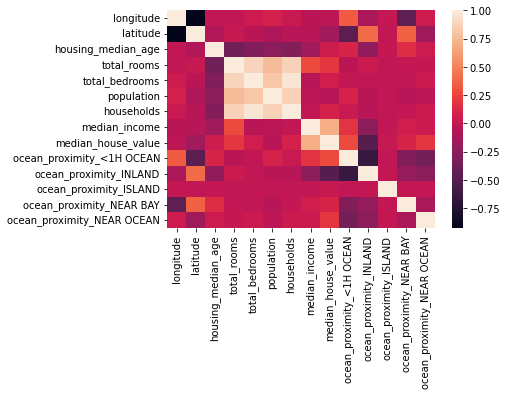

In [46]:
# Plot the correlation matrix of the dataframe
sns.heatmap(y.corr())

# There is a strong correlation between total_bedrooms and total_rooms and between population and households
# There is also a correlation between median_income and median_house_value

### 1.c Relevance verification 
Observe the correlation matrix between features and the target. Which features do you think are
more likely to be selected when performing Feature Selection for a linear model? Do you think
your answer will also hold for other regression models? Why?
<div class="alert alert-success">
    
**Find most relevant features**
    
* **Plot** the correlation between each feature and the target, using the 'heatmap' function from the **seaborn** module.
* Can you tell which features are the most relevant for a **linear regression model** ?

</div>

In [47]:
# The msot relevant features are median_income, ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_NEAR OCEAN, ocean_proximity_NEAR BAY, population, housing_median_age, latitude, longitude

#y = y.drop(['total_bedrooms', 'population', 'households','median_house_value'], axis=1)

### 1.d Balance of Influences

Observe the modified dataset once again: are all features of the same order of magnitude? Does
this variation affect a linear regressor? And a KNN regressor? How would you solve this?

<div class="alert alert-success">
    
**Make sure features have equal impact on the regression models.**
    
* Can you identify which features may overwhelm others ?
* **Scale** each feature to a common range of values.

</div>

In [48]:
# Rank features by variances 
ranking = y.var().sort_values(ascending=False)
print(ranking)

# Normalise the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y_scaled = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

ranking_scaled = y_scaled.var().sort_values(ascending=False)
print(ranking_scaled)


median_house_value            1.182563e+10
total_rooms                   1.780404e+06
population                    4.938175e+05
total_bedrooms                6.828994e+04
households                    5.655353e+04
housing_median_age            1.206270e+02
latitude                      4.013337e+00
longitude                     3.522442e+00
median_income                 2.678395e+00
ocean_proximity_<1H OCEAN     2.495729e-01
ocean_proximity_INLAND        2.142275e-01
ocean_proximity_NEAR OCEAN    1.063066e-01
ocean_proximity_NEAR BAY      8.121440e-02
ocean_proximity_ISLAND        1.226317e-04
dtype: float64
ocean_proximity_NEAR BAY      1.000061
ocean_proximity_NEAR OCEAN    1.000061
longitude                     1.000061
households                    1.000061
median_house_value            1.000061
ocean_proximity_INLAND        1.000061
ocean_proximity_ISLAND        1.000061
housing_median_age            1.000061
total_rooms                   1.000061
population                    1.

### 1.e Train-Test Split

To test out the generalization of your linear regressor, a data separation step is necessary. You'll now split the dataset in two equal parts at random ({X_train, Y_train} and {X_test, Y_test}). This will allow you to build a model on the former and assess its performance on the latter.

<div class="alert alert-success">
  
* **Split** the dataset in training and test subsets.

</div>

In [53]:
# Split the dataset into a training set and a test set
train_set, test_set = sklearn.model_selection.train_test_split(y_scaled, test_size=0.5)
X_train = train_set.drop(['median_house_value'], axis=1)
Y_train = train_set['median_house_value']
X_test = test_set.drop(['median_house_value'], axis=1)
Y_test = test_set['median_house_value']

## 2. Feature Selection

Keeping unnecessary feature while training a machine learning model has several disadvantages such as increase its comlexity, and decrease its generalization ability.

Hence, feature selection is one of the important steps while building a machine learning model. the goal of this step is to find the best possible set of features for building a model with best possible accuracy and lowest bias.

<div class="alert alert-success">
  
* **Run** the following cells and observe the RMSE obtained after training on all features. 
    
    We will try to improve the performances with feature selection.

</div>

In [50]:
# Compute the Root Mean Square Error
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

In [51]:
def fit_predict_with_features(X_train,Y_train, X_test, selected_features):
    X_train_filtered = X_train[selected_features]
    X_test_filtered = X_test[selected_features]
    
    linear_regression_m = LinearRegression()
    linear_regression_m.fit(X_train_filtered,Y_train)
    y_pred = linear_regression_m.predict(X_test_filtered)
    
    return y_pred


In [54]:
print('RMSE Without FS')
Y_pred = fit_predict_with_features(X_train,Y_train, X_test, X_train.columns)
print(compute_rmse(Y_pred, Y_test.to_numpy()))


RMSE Without FS
0.5668287183076868


## 2.1 Filtering

A first common method for feature selection is filtering out the available features that are unnecessary/redundant:

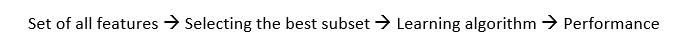

This filtering can be based on several metrics or statistical tests such as **Correlation coefficient**, **Mutual information**, **Chi-square tests**...

Today, we ask you to select relevant features using the filtering method. To do so, define a correlation threshold between
the features and the target and filter out features with a correlation lower than this threshold.


<div class="alert alert-success">
  
**Feature selection by filtering**
    
* According to your thoughts from section 1.3, **select** a subset of features based on their correlation coefficient with the target.
* Dou you get improved performances compared to unfiltered dataset?

</div>

In [58]:
# keep only the features with high correlation

#################### vvvvvvvv
## QUESTION Define threshold and filter out the features with corr < thresh
# create a variable named relevant_features containing a pandas series with the features to keep.
#
# relevant_features = ??????
#################### ^^^^^

threshold = 0.3
relevant_features = y.corr().median_house_value[abs(y.corr().median_house_value) > threshold]

rf = [k for k,v in relevant_features.items() if k != 'median_house_value']
print(rf)

['median_income', 'ocean_proximity_INLAND']


In [59]:
y_pred = fit_predict_with_features(X_train,Y_train, X_test, rf)

print('RMSE after Filter')
print(compute_rmse(y_pred, Y_test.to_numpy()))

RMSE after Filter
0.6406118809282267


## 2.2 Wrapper method

Wrappers methods are iterative methods to select a subset of features to train a model such that addition and removal of features takes place according to conclusions made from prior training of the model. 

Stopping criteria for selecting the best subset are usually pre-defined e.g. when the performance of the model decreases or a specific number of features has been achieved. 

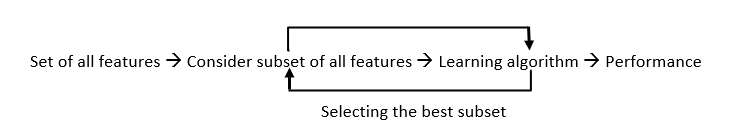

The main advantage of wrapper methods over the filter methods is that they provide an optimal set of features for training the model, thus resulting in better accuracy than the filter methods but are computationally more expensive.


<div class="alert alert-success">
  
**Feature selection by Wrapping methods**
    
* Apply both **Forward** and **Backward** feature selection using functions classes from **sklearn.feature_selection**
* **Compare** the performances with models trained on different feature subsets.
    
</div>

### Forward

In [69]:
#################### 
# QUESTION create new linear regressor + Use SFS in forward mode
# What are the selected features ? Print their names.
#
# sfs = ???
# selected_features_sfs_forward = ???
#################### 

sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select="auto", direction='forward')

selected_features_sfs_forward = sfs.fit(X_train, Y_train).feature_names_in_

print(selected_features_sfs_forward)



['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [70]:
y_pred = fit_predict_with_features(X_train,Y_train, X_test, selected_features_sfs_forward)

print('RMSE with wrapper Forward')
print(compute_rmse(y_pred, Y_test.to_numpy()))

RMSE with wrapper Forward
0.5668287183076868


### Backward

In [81]:
# Backward
####################
# QUESTION create new linear regressor + Use SFS in backward mode
# What are the selected features ? Print their names.
#
# sfs = ???
# selected_features_sfs_backward = ???
####################

sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3, direction='backward')

selected_features_sfs_backward = sfs.fit(X_train, Y_train).feature_names_in_

print(selected_features_sfs_backward)

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [80]:
y_pred = fit_predict_with_features(X_train,Y_train, X_test, selected_features_sfs_backward)

print('RMSE with wrapper Backward')
print(compute_rmse(y_pred, Y_test.to_numpy()))

RMSE with wrapper Backward
0.5668287183076868
